In [2]:
from tkinter import filedialog

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np

from keys import *

# # bit clunky in a notebook
# stdFilePath = "data"
# selectedFile = filedialog.askopenfilename(initialdir=stdFilePath,
#                                           title="Select file",
#                                           filetypes=(("Only logs", "*.csv"),
#                                                      ("all files", "*.*")))
# if selectedFile == "":
#     exit("[ERR] Please select a file")

# selectedFile = "data/example.csv"
selectedFile = "data/survey/tempsurvey.csv"

df = pd.read_csv(selectedFile,
                 encoding="utf-16",
                 skiprows=range(1, 2),
                 header=0
                 )

# df.head()
# df.dtypes
# df.columns
# df["SS01_01"].describe()


In [32]:
# Helper functions
        
def makeBoxPlot(data, labels, title, rot=50, ylabel="Trifft zu", save=False, show=True):
    plt.figure()
    plt.boxplot(x=data, labels=labels)
    plt.xticks(rotation=rot)
    plt.title(title + ", n=" + str(len(data)))
    plt.ylabel(ylabel)
    plt.grid(linestyle="--", linewidth=0.3)
    if save:
        plt.savefig(title)
    if show:
        plt.show()  
        
# Based on: https://rowannicholls.github.io/python/graphs/plt_based/boxplots_multiple_groups.html
def groupedBoxPlots(datasets, groups, labels=None, title="Default title", width=0.6):
    colours = ['blue', 'red', "green", "orange"]
    if not labels:
        labels=list(datasets[0])
    # Set x-positions for boxes
    x_pos_range = np.arange(len(datasets)) / (len(datasets) - 1)
    x_pos = (x_pos_range * 0.5) + 0.75
    # Plot
    for i, data in enumerate(datasets):
        positions = [x_pos[i] + j * 1 for j in range(len(data.T))]
        bp = plt.boxplot(
            np.array(data), 
            sym='', 
            whis=[0, 100], 
            labels=labels, 
            patch_artist=True,
            positions=positions,
            widths=width / len(datasets), 
        )
        # Fill the boxes with colours (requires patch_artist=True)
        k = i % len(colours)
        for box in bp['boxes']:
            box.set(facecolor=colours[k])
        # Make the median lines more visible
        plt.setp(bp['medians'], color='black')


    # Titles
    plt.title(title + ", n=" + str(len(datasets[0])))
    plt.ylabel('1 to 5 Scale')
    plt.xlabel('Question')
    # Axis ticks and labels
    plt.xticks(np.arange(len(list(datasets[0]))) + 1, rotation=50)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.subplots_adjust(right=0.98)
    # Change the limits of the x-axis
    plt.xlim([0.5, len(list(datasets[0])) + 0.5])
    # Legend
    legend_elements = []
    for i in range(len(datasets)):
        j = i % len(groups)
        k = i % len(colours)
        legend_elements.append(Patch(facecolor=colours[k], label=groups[j]))
    plt.legend(handles=legend_elements, fontsize=8)
    # Straight lines
    plt.grid(linestyle="--", linewidth=0.3)

    plt.show()



# Survey

### Short Stress State

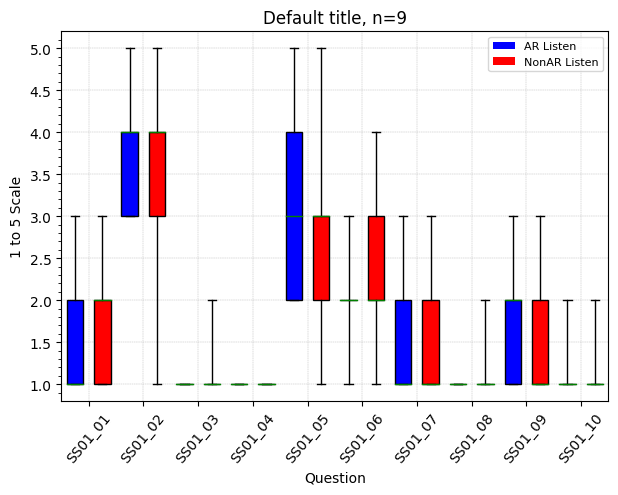

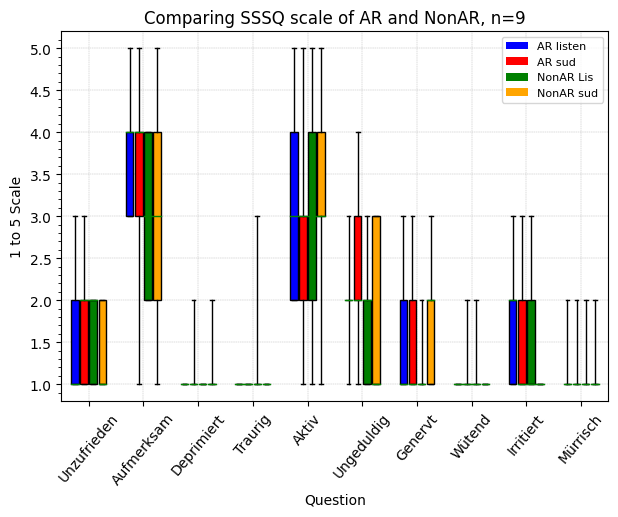

In [35]:
groupedBoxPlots([df[SSSQ.Scale.AR.Listen_Keys], df[SSSQ.Scale.NonAR.Listen_Keys]], 
                ["AR Listen ", "NonAR Listen"])

groupedBoxPlots(
    [df[SSSQ.Scale.AR.Listen_Keys], 
     df[SSSQ.Scale.NonAR.Listen_Keys],
     df[SSSQ.Scale.AR.Sudoku_Keys], 
     df[SSSQ.Scale.NonAR.Sudoku_Keys]],
     ["AR listen", "AR sud", "NonAR Lis", "NonAR sud"],
     labels=SSSQ.Scale.Names,
     title="Comparing SSSQ scale of AR and NonAR",
     width=0.55
)


# makeBoxPlot(df[SSSQ.Scale.AR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach AR listen")
# makeBoxPlot(df[SSSQ.Scale.NonAR.Listen_Keys], SSSQ.Scale.Names, "SSSQ nach Non-AR listen")
# makeBoxPlot(df["DD01_01"], ["Alter"], "Demographie Übersicht")


### Short User Experience Questionaire

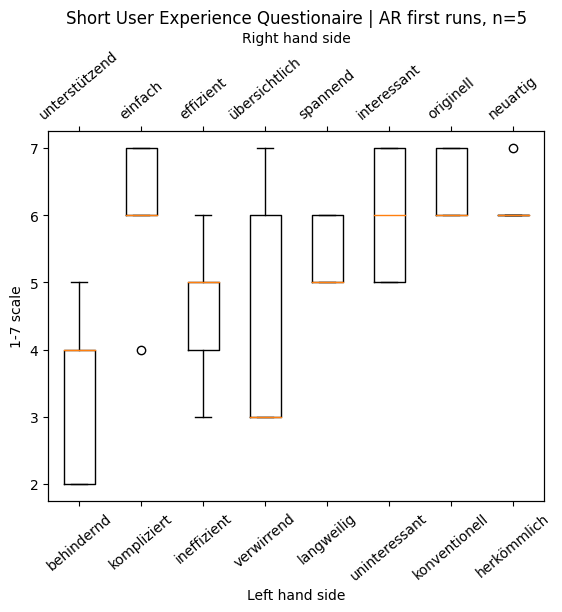

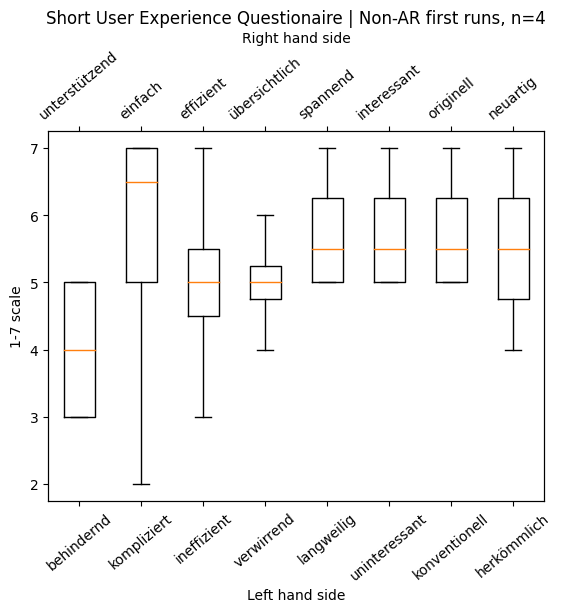

In [10]:

def dualAxisUeqBoxplot(data, title):
    rot = 40
    fig, ax = plt.subplots()
    ax.boxplot(x=data)
    ax.set_xlabel('Left hand side')
    ax.set_ylabel('1-7 scale')
    ax.set_title("Short User Experience Questionaire | " + title + ", n=" + str(len(data)))
    ax.set_xticklabels(labels=ShortUserExpQ.Names_left, rotation=rot)

    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    ax2.set_xticklabels(labels=ShortUserExpQ.Names_right, rotation=rot)
    ax2.set_xlabel("Right hand side")
    plt.show()

dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="ArFirst")][ShortUserExpQ.Keys], "AR first runs")
dualAxisUeqBoxplot(df.loc[(df["QUESTNNR"]=="NonArFirst")][ShortUserExpQ.Keys], "Non-AR first runs")


# Headtracking

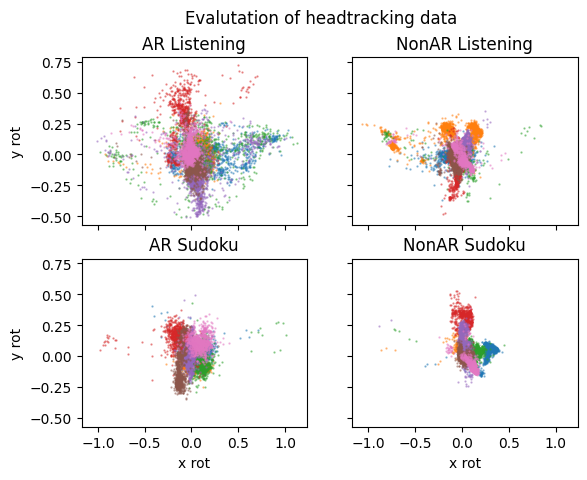

In [103]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

headtracking_files = glob.glob("data/headtracking/*.csv")
headtracking_dfs = (pd.read_csv(file) for file in headtracking_files)


fig, axs = plt.subplots(2, 2)

for i in headtracking_dfs:
    alpha = 0.5
    size = 0.4
    x_axis = "rotX"
    y_axis = "rotY"
    calibrationWindow = 5

    # Get the selected headtracking rows for each task permutation
    arlisten = i.loc[(i["ARorNonAR"]=="AR") & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    nonarlisten = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Listening")][[x_axis, y_axis]]
    arsudoku = i.loc[(i["ARorNonAR"]=="AR") & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]
    nonarsudoku = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Sudoku")][[x_axis, y_axis]]

    datasets = [arlisten, nonarlisten, arsudoku, nonarsudoku]
    titles = ["AR Listening", "NonAR Listening", "AR Sudoku", "NonAR Sudoku"]

    # Normalise to center of screen
    for j, ax in enumerate(axs.flat):
        ax.set_title(titles[j])
        datasets[j] -= datasets[j].iloc[0:calibrationWindow].sum() / calibrationWindow
        ax.scatter(datasets[j][x_axis], datasets[j][y_axis], alpha=alpha, s=size)
        

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel='x rot', ylabel='y rot')
    ax.label_outer()
    # use shared or custom below
    ax.sharex(axs[0,0])
    ax.sharey(axs[0,0])

# Custom axis sizes
# Xlim = (-1.5, 1.5)
# Ylim = (-0.4, 0.75)
# plt.setp(axs, xlim=Xlim, ylim=Ylim)

title="Evalutation of headtracking data"
fig.suptitle(title)
# plt.tight_layout()
# plt.savefig(title, dpi=500)
plt.show()